## Accurate occupancy detection in an office room

This task deals in predicting the occupancy of an office room using different statistical models.

This was achieved with the help of reliable sensor data measuing temperature, Humidity, Light and CO2 in the office room with a camera for ground truth occupany data.

Humidity ratio (W) was calculated with the measured temperature and relative Humidity in the room.

We have used three datasets in this work, one for training and two for testing our statistical model.

Statistical models:

1) Logistics regression

2) Random Forect Classifier

This work deals in training our two statistical models on given training datasets and then comparing their predictive accuracy on given test datasets.

The intuition behind our work is to analyse which statistical model proves to fit better while dealing with the given number of features and their parameters in the datasets.





In [1]:
# Import Pandas for efficient data handling 
# Import Numpy for efficient scientific computing
import pandas as pd
import numpy as np

In [2]:
#Reading the given datatraining.csv file
df= pd.read_csv('datatraining.csv', header=0, delim_whitespace=False, na_values='?', index_col=None)

In [3]:
df.head(6)       #Checking our data

,No.,Date,Time,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,2/4/15 0:00,5:51:00 PM,23.18,27.2720,426.0,721.25,0.004793,1
1,2,2/4/15 0:00,5:51:59 PM,23.15,27.2675,429.5,714.00,0.004783,1
2,3,2/4/15 0:00,5:53:00 PM,23.15,27.2450,426.0,713.50,0.004779,1
3,4,2/4/15 0:00,5:54:00 PM,23.15,27.2000,426.0,708.25,0.004772,1
4,5,2/4/15 0:00,5:55:00 PM,23.10,27.2000,426.0,704.50,0.004757,1
5,6,2/4/15 0:00,5:55:59 PM,23.10,27.2000,419.0,701.00,0.004757,1


In [4]:
df.keys()       #Printing all coloums values

Index(['No.', 'Date', 'Time', 'Temperature', 'Humidity', 'Light', 'CO2',
       'HumidityRatio', 'Occupancy'],
      dtype='object')

Storing the 'Occupancy' column in a Ytrain variable

In [5]:
ytrain=df['Occupancy']    #Storing the 'Occupancy' column in a Ytrain variable

Extracting our features from file.

In [6]:
xtrain=df[['Temperature','Humidity','Light','CO2','HumidityRatio']]  #Extracting our features from file.

In [7]:
print('The shape of our target training data :',ytrain.shape)

The shape of our target training data : (8143,)


In [8]:
print('The shape of our feature training data :',xtrain.shape)

The shape of our feature training data : (8143, 5)


Now that we have extracted our training dataset, we are ready to train it on our two statistic models.

# Logistic Regression Classifier Model

We will proceed with our first model : Logistic Regression Classifier.

In [9]:
#Importing linear_model package
from sklearn import linear_model    

In [10]:
logregr=linear_model.LogisticRegression(penalty='l2', C=1.0)  #Creating a logistic regression variable.

In [11]:
#Fitting our training dataset.

logregr.fit(xtrain, ytrain)   

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
#import graph plot library

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
w=logregr.coef_.T  #Printing the logistic regression coefficient values

print(w)

[[ -5.16482752e-01]
 [  4.40977352e-02]
 [  1.99510758e-02]
 [  4.31632202e-03]
 [ -3.47110740e-05]]


Plotting the relative importance of Logistic Coefficients

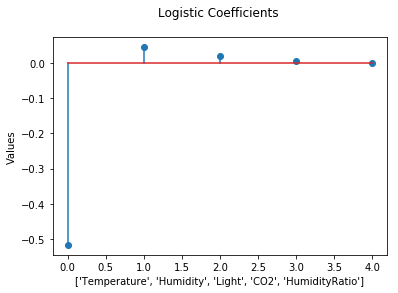

In [14]:
features=["Temperature","Humidity", "Light", "CO2","HumidityRatio"]
plt.stem(w)
plt.xlabel(features)
plt.ylabel('Values')
plt.title('Logistic Coefficients \n')

# Test dataset 1

Now we will apply our trained logistic regression model to our test datasets.

In [15]:
#reading the given Datatest,csv file

df1=pd.read_csv('datatest.csv', header=0, delim_whitespace=False, index_col=None)

In [16]:
df1.head(6)   #checking our data

,No.,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,140,2/2/15 14:19,23.7000,26.272,585.200000,749.200000,0.004764,1
1,141,2/2/15 14:19,23.7180,26.290,578.400000,760.400000,0.004773,1
2,142,2/2/15 14:21,23.7300,26.230,572.666667,769.666667,0.004765,1
3,143,2/2/15 14:22,23.7225,26.125,493.750000,774.750000,0.004744,1
4,144,2/2/15 14:23,23.7540,26.200,488.600000,779.000000,0.004767,1
5,145,2/2/15 14:23,23.7600,26.260,568.666667,790.000000,0.004779,1


In [17]:
yts1=df1['Occupancy']  #extracting our target test dataset


In [18]:
print('The shape of our target test dataset:', yts1.shape)

The shape of our target test dataset: (2665,)


In [19]:
xts1=df1[['Temperature','Humidity','Light','CO2','HumidityRatio']]  #extracting our features test dataset


In [20]:
print('The shape of our features test dataset:', xts1.shape)

The shape of our features test dataset: (2665, 5)


In [21]:
#Predicting the trained model on our test dataset

yhat1=logregr.predict(xts1)  

In [22]:
#Calculating the accuracy of our trained model

acc1= np.mean(yhat1==yts1)
print(acc1)

0.978236397749


Importing classification report and confusion matrix to check our model efficiency.



In [23]:
from sklearn.metrics import classification_report, confusion_matrix

print('\n classification report: \n\n', classification_report(yts1,yhat1,target_names=['class 0','class 1']))
print('\n confusion matrix: \n\n', confusion_matrix(yts1,yhat1))


 classification report: 

              precision    recall  f1-score   support

    class 0       1.00      0.97      0.98      1693
    class 1       0.95      1.00      0.97       972

avg / total       0.98      0.98      0.98      2665


 confusion matrix: 

 [[1638   55]
 [   3  969]]


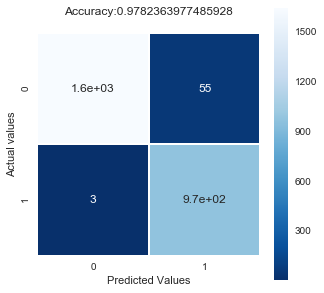

In [24]:
#importing seaborn package for plotting.
import seaborn as sn

cm=confusion_matrix(yts1,yhat1)
plt.figure(figsize=(5,5))
sn.heatmap(cm,annot=True, linewidth=1.5, square=True, cmap='Blues_r')
plt.ylabel('Actual values')
plt.xlabel('Predicted Values')
plt.title('Accuracy:{0}\n'.format(acc1))

Test Dataset-1 Accuracy=97.8%

Testing our model for Test Dataset 2

# Test dataset 2

In [25]:
#Reading our second test dataset points.

df2= pd.read_csv('datatest2.csv', header=0, delim_whitespace=False, index_col=None)

In [26]:
df2.head(6)

,No.,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,2/11/15 14:48,21.7600,31.133333,437.333333,1029.666667,0.005021,1
1,2,2/11/15 14:49,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2,3,2/11/15 14:50,21.7675,31.122500,434.000000,1003.750000,0.005022,1
3,4,2/11/15 14:51,21.7675,31.122500,439.000000,1009.500000,0.005022,1
4,5,2/11/15 14:51,21.7900,31.133333,437.333333,1005.666667,0.005030,1
5,6,2/11/15 14:53,21.7600,31.260000,437.333333,1014.333333,0.005042,1


In [27]:
yts2=df2['Occupancy']

In [28]:
print('The shape of our target test dataset:', yts2.shape)

The shape of our target test dataset: (9752,)


In [29]:
xts2=df2[['Temperature','Humidity','Light','CO2','HumidityRatio']]


In [30]:
print('The shape of our features test dataset:', xts2.shape)

The shape of our features test dataset: (9752, 5)


In [31]:
#predicting the trained model on our second datasets.

yhat2=logregr.predict(xts2)

In [32]:
#calculating the accuracy of our model on second dataset

acc2=np.mean(yhat2==yts2)
print(acc2)

0.992924528302


Applying classification and confusion matrix to check the efficiency of our model.

In [33]:
print('\n classification report: \n\n',classification_report(yts2,yhat2, target_names=['class 0','class 1']))
print('\n confusion_matrix: \n\n', confusion_matrix(yts2,yhat2))


 classification report: 

              precision    recall  f1-score   support

    class 0       1.00      0.99      1.00      7703
    class 1       0.97      0.99      0.98      2049

avg / total       0.99      0.99      0.99      9752


 confusion_matrix: 

 [[7646   57]
 [  12 2037]]


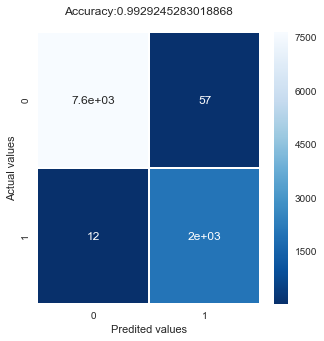

In [34]:
#Plotting our confusion matrix.

cm2= confusion_matrix(yts2,yhat2)
plt.figure(figsize=(5,5))
sn.heatmap(cm2, annot=True, linewidth=1.5, cmap='Blues_r')
plt.ylabel('Actual values')
plt.xlabel('Predited values')
plt.title('Accuracy:{0}\n'.format(acc2))

Test Dataset-2 Accuracy=99.2%

Let's check the performance from our randomForest Classifier

# Random Forest Classifier Model

Training our second model: Random Forest Classifier Model

In [35]:
from sklearn.ensemble import RandomForestClassifier



In [36]:
#Creating a RandomForest Classifier variable

rf=RandomForestClassifier(n_estimators=100,random_state=42)


In [37]:
#Fitting our model to the training set

rf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [38]:
rf.feature_importances_

array([ 0.09559691,  0.02710241,  0.59774392,  0.24718977,  0.03236699])

This depicts the importance and contribution of each feature towards our prediction.

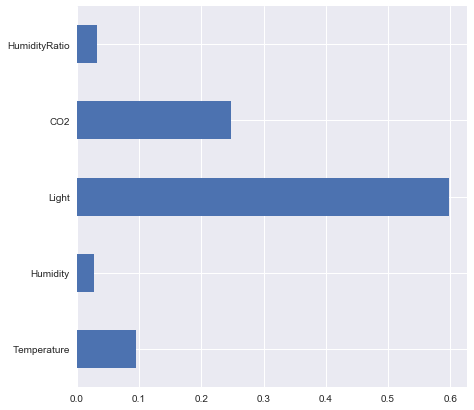

In [39]:
feature_importance=pd.Series(rf.feature_importances_ , index=xtrain.columns)
feature_importance.plot(kind='barh', figsize=(7,7))

# Test dataset 1

In [40]:
#Predicting our model on first test dataset

yhat_rf1=rf.predict(xts1)

Checking our model accuracy

In [41]:
acc_rf1=np.mean(yhat_rf1==yts1)
print(acc_rf1)

0.953470919325


Analyzing our model efficiency through classification report and confusion matrix.

In [42]:
print('Classification report :\n', classification_report(yts1,yhat_rf1,target_names=['Class 0','Class 1']))
print('Confusion matrix :\n\n', confusion_matrix(yts1,yhat_rf1))

Classification report :
              precision    recall  f1-score   support

    Class 0       0.96      0.97      0.96      1693
    Class 1       0.94      0.93      0.94       972

avg / total       0.95      0.95      0.95      2665

Confusion matrix :

 [[1640   53]
 [  71  901]]


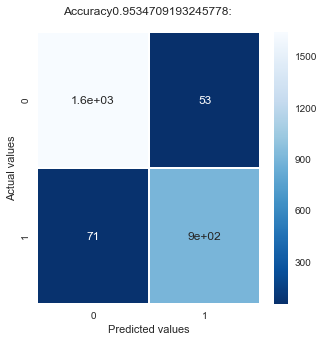

In [43]:
#Analysing the confusion matrix graphically.

cm_rf1=confusion_matrix(yts1,yhat_rf1)
plt.figure(figsize=(5,5))
sn.heatmap(cm_rf1,annot=True,linewidth=1.5,cmap='Blues_r')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Accuracy{0}: \n'.format(acc_rf1))

Test dataset-1 Accuracy=95.3%

# Test Dataset 2

In [44]:
#Predicting on second test dataset

yhat_rf2=rf.predict(xts2)

In [45]:
#the accuracy of our model

acc_rf2=np.mean(yhat_rf2==yts2)
print(acc_rf2)

0.972210828548


In [46]:
#analysing the model efficiency using classification report and confusion matrix.

print('Classification report :\n\n', classification_report(yts2,yhat_rf2,target_names=['Class 0','Class 1']))
print('Confusion matrix :\n\n', confusion_matrix(yts2,yhat_rf2))

Classification report :

              precision    recall  f1-score   support

    Class 0       1.00      0.97      0.98      7703
    Class 1       0.89      1.00      0.94      2049

avg / total       0.98      0.97      0.97      9752

Confusion matrix :

 [[7439  264]
 [   7 2042]]


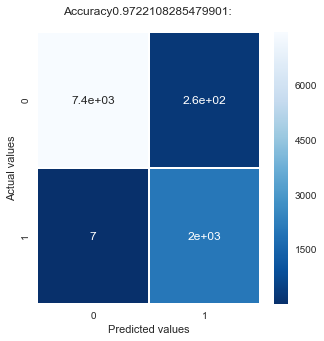

In [47]:
#Confusion matrix graphically.

cm_rf2=confusion_matrix(yts2,yhat_rf2)
plt.figure(figsize=(5,5))
sn.heatmap(cm_rf2,annot=True,linewidth=1.5,cmap='Blues_r')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Accuracy{0}: \n'.format(acc_rf2))

Test Dataset-2 Accuracy=97.2%

# Logistic Classifier vs RandomForest Classifier 

In [48]:
#Appending all the respective model accuracies in a list.

results=[]
results.append(acc1)
results.append(acc2)
results.append(acc_rf1)
results.append(acc_rf2)
names=["LC-T1","LC-T2","RF-T1","RF-T2"]


# Comparing Model Accuracies graphically

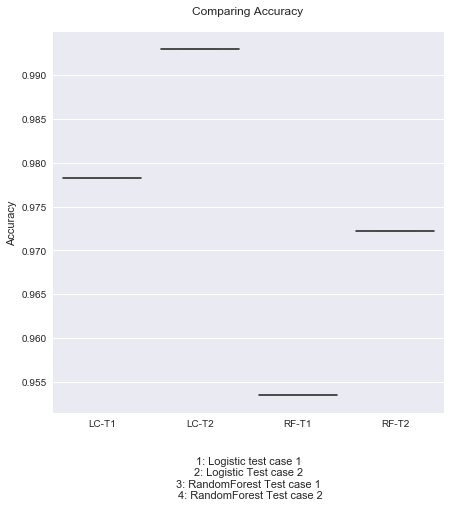

In [49]:
plt.figure(figsize=(7,7))

sn.boxplot(x=names, y=results)
plt.xlabel('\n \n 1: Logistic test case 1 \n 2: Logistic Test case 2 \n 3: RandomForest Test case 1 \n 4: RandomForest Test case 2')
plt.ylabel('Accuracy')
plt.title('Comparing Accuracy \n')

# Analysis

Logistic Classifier and RandomForest Classifier performed very well on test datasets with over 95% accuracy.

We also analysed a very insightful result:

1) The Logistic classifier coefficient has Temperature and Humidity as their leading features in importance rank.

2) The RandomForest Classifier coefficient has Light and CO2 as their leading features in importance rank.

The paper published by Luis M Candanedo and Veronique Feldheim has established that :

RandomForest classifier accuracy on test-set 1 - 95.3% 

RandomForest Classifier accuracy on test-set 2 - 97.2%

Thus, as the above results, we have achieved the same accuracies as it was established in paper.

Logistic Regression Classifier was not used in the paper.
The paper mentioned that Logistic Classifier outputs were not stable.

The Logistic classifier achieved 97.8% on test-set 1 and 99.2% in test-set 2.

Thus, Logistic Classifier outperformed the RandomForest Classifier by a few margin.


